# Post Processing Experimentation

## Setup

In [1]:
!pip install timm==0.6.7 plotly datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.0/510.0 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
  Attempting uninstall: timm
    Found existing installation: timm 1.0.12
    Uninstalling timm-1.0.12:
      Successfully uninstalled timm-1.0.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==

In [2]:
import torch

torch.hub.help("intel-isl/MiDaS", "DPT_BEiT_L_384", force_reload=True)  # Triggers fresh download of MiDaS repo


repo = "isl-org/ZoeDepth"
# Zoe_N
model_zoe_n = torch.hub.load(repo, "ZoeD_N", pretrained=True)

# Zoe_K
model_zoe_k = torch.hub.load(repo, "ZoeD_K", pretrained=True)

# Zoe_NK
model_zoe_nk = torch.hub.load(repo, "ZoeD_NK", pretrained=True)

/usr/local/lib/python3.10/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or help(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use help(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/intel-isl/MiDaS/zipball/master" to /root/.cache/torch/hub/master.zip
/usr/local/lib/python3.10/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {c

img_size [384, 512]


Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master
/usr/local/lib/python3.10/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Params passed to Resize transform:
	width:  512
	height:  384
	resize_target:  True
	keep_aspect_ratio:  True
	ensure_multiple_of:  32
	resize_method:  minimal
Using pretrained resource url::https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_N.pt


Downloading: "https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_N.pt" to /root/.cache/torch/hub/checkpoints/ZoeD_M12_N.pt
100%|██████████| 1.34G/1.34G [00:15<00:00, 95.6MB/s]


Loaded successfully


Using cache found in /root/.cache/torch/hub/isl-org_ZoeDepth_main


Overwriting config with config_version kitti
img_size [384, 768]


Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


Params passed to Resize transform:
	width:  768
	height:  384
	resize_target:  True
	keep_aspect_ratio:  True
	ensure_multiple_of:  32
	resize_method:  minimal
Using pretrained resource url::https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_K.pt


Downloading: "https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_K.pt" to /root/.cache/torch/hub/checkpoints/ZoeD_M12_K.pt
100%|██████████| 1.34G/1.34G [00:32<00:00, 43.8MB/s]


Loaded successfully


Using cache found in /root/.cache/torch/hub/isl-org_ZoeDepth_main


img_size [384, 512]


Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


Params passed to Resize transform:
	width:  512
	height:  384
	resize_target:  True
	keep_aspect_ratio:  True
	ensure_multiple_of:  32
	resize_method:  minimal
Using pretrained resource url::https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_NK.pt


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
Downloading: "https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_NK.pt" to /root/.cache/torch/hub/checkpoints/ZoeD_M12_NK.pt
100%|██████████| 1.35G/1.35G [00:18<00:00, 78.0MB/s]


Loaded successfully


## Inference

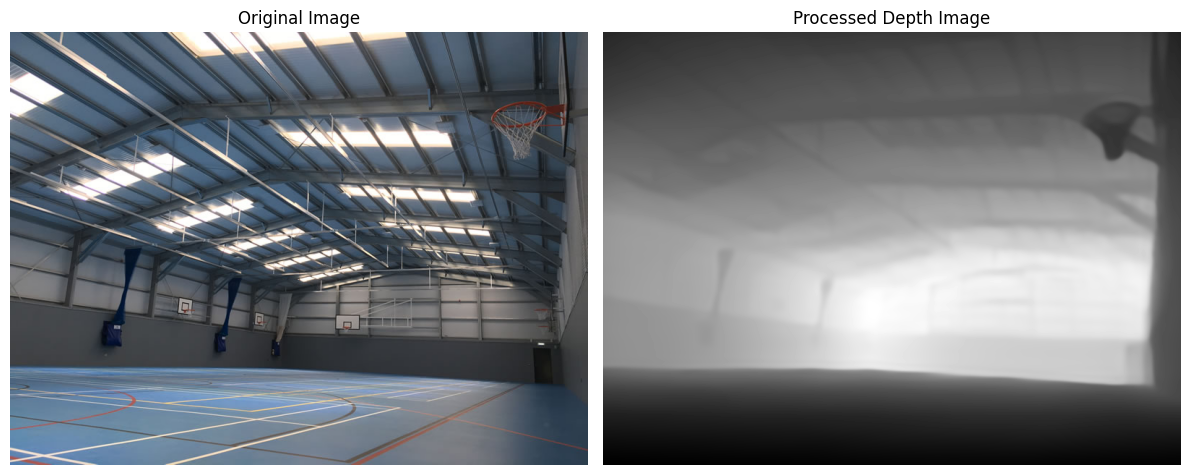

In [3]:
import requests
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

##### sample prediction
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
zoe = model_zoe_n.to(DEVICE)

url = "https://smart-space.co.uk/content/gallery/steel/stcou8-02/stcou8-9.jpg"

# Fetch the image from the URL
response = requests.get(url)
response.raise_for_status()

image = Image.open(BytesIO(response.content))

depth_pil = zoe.infer_pil(image, output_type="pil")  # as 16-bit PIL Image

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display the original image
axes[0].imshow(image)
axes[0].axis('off')
axes[0].set_title("Original Image")

# Display the processed (normalized) image
axes[1].imshow(depth_pil, cmap='gray')
axes[1].axis('off')
axes[1].set_title("Processed Depth Image")

# Show the plot
plt.tight_layout()
plt.show()

## Evaluation of Baseline ZoeDepth

In [12]:
# Import necessary libraries
from datasets import load_dataset
from PIL import Image
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math


# Load the dataset
ds = load_dataset("sayakpaul/nyu_depth_v2", streaming=True, split="train", trust_remote_code=True)
def normalize_depth(depth):
    """Normalize a depth map to the range [0, 1]."""
    min_depth = np.min(depth)
    max_depth = np.max(depth)
    if max_depth - min_depth == 0:  # Avoid division by zero
        return np.zeros_like(depth)
    return (depth - min_depth) / (max_depth - min_depth)


# Define utility functions
def compute_metrics(true_depth, predicted_depth):
    """
    Compute evaluation metrics: MAE and RMSE.

    Args:
    - true_depth (numpy.ndarray): Ground truth depth map.
    - predicted_depth (numpy.ndarray): Predicted depth map.

    Returns:
    - dict: Dictionary containing MAE and RMSE values.
    """
    mae = mean_absolute_error(true_depth, predicted_depth)
    rmse = math.sqrt(mean_squared_error(true_depth, predicted_depth))
    return {"MAE": mae, "RMSE": rmse}

def process_depth(depth_pil):
    """
    Convert a PIL depth image to a numpy array and normalize.

    Args:
    - depth_pil (PIL.Image.Image): Depth image as a PIL Image.

    Returns:
    - numpy.ndarray: Normalized depth array.
    """
    depth_array = np.array(depth_pil).astype(np.float32)
    return depth_array / 65535.0  # Normalize 16-bit depth

# Define the evaluation function
def evaluate_model(zoe, dataset, max_samples=100):
    """
    Evaluate a ZoeDepth model on the NYU Depth V2 dataset.

    Args:
    - zoe: ZoeDepth model instance.
    - dataset: Streaming dataset (e.g., NYU Depth V2).
    - max_samples: Maximum number of samples to evaluate.
    - preprocess_fn: Optional preprocessing function for input images.

    Returns:
    - list of dict: Metrics for each sample.
    """
    metrics = []
    for idx, sample in enumerate(dataset):
        # print(sample)
        if idx >= max_samples:
            break

        # Load and preprocess image
        image = sample["image"]
        if isinstance(image, Image.Image):  # Check if already a PIL image
            pass
        else:
            image = Image.open(image).convert("RGB")  # Convert to RGB if necessary

        # Load ground truth depth
        depth = sample["depth_map"]
        if isinstance(depth, Image.Image):  # Check if already a PIL image
            true_depth = process_depth(depth)
        else:
            true_depth = process_depth(Image.open(depth))

        # Predict depth using ZoeDepth
        predicted_depth_pil = zoe.infer_pil(image, output_type="pil")
        predicted_depth = process_depth(predicted_depth_pil)

        # normalize depth
        true_depth = normalize_depth(true_depth)
        predicted_depth = normalize_depth(predicted_depth)



        # Compute metrics
        sample_metrics = compute_metrics(true_depth, predicted_depth)
        metrics.append(sample_metrics)

        # Print progress
        print(f"Processed {idx + 1}/{max_samples} samples: MAE = {sample_metrics['MAE']:.4f}, RMSE = {sample_metrics['RMSE']:.4f}")

    # Compute average metrics
    avg_mae = np.mean([m["MAE"] for m in metrics])
    avg_rmse = np.mean([m["RMSE"] for m in metrics])
    print(f"\nAverage Metrics: MAE = {avg_mae:.4f}, RMSE = {avg_rmse:.4f}")

    return metrics

# Evaluate the Baseline ZoeDepth model
# results = evaluate_model(zoe, ds, max_samples=50)


In [13]:
def evaluate_with_processing(zoe, dataset, processing_fn, max_samples=100, preprocess_fn=None):
    """
    Evaluate a ZoeDepth model with additional post-processing on the NYU Depth V2 dataset.

    Args:
    - zoe: ZoeDepth model instance.
    - dataset: Streaming dataset (e.g., NYU Depth V2).
    - processing_fn: Function to apply additional processing to the predicted depth map.
    - max_samples: Maximum number of samples to evaluate.
    - preprocess_fn: Optional preprocessing function for input images.

    Returns:
    - list of dict: Metrics for each sample.
    """

    metrics = []
    for idx, sample in enumerate(dataset):
        if idx >= max_samples:
            break

        # Load and preprocess image
        image = sample.get("image")
        if isinstance(image, Image.Image):  # Check if already a PIL image
            pass
        else:
            image = Image.open(image).convert("RGB")  # Convert to RGB if necessary

        if preprocess_fn:
            image = preprocess_fn(image)

        depth = sample["depth_map"]

        if isinstance(depth, Image.Image):  # Check if already a PIL image
            true_depth = process_depth(depth)
        else:
            true_depth = process_depth(Image.open(depth))

        # Normalize ground truth depth
        true_depth = normalize_depth(true_depth)

        # Predict depth using ZoeDepth and apply post-processing
        processed_pred, raw_pred = processing_fn(image)  # Apply processing_fn to include the sharpening technique

        # Normalize predictions
        raw_pred = normalize_depth(raw_pred)
        processed_pred = normalize_depth(processed_pred)

        # Compute metrics
        raw_metrics = compute_metrics(true_depth, raw_pred)
        processed_metrics = compute_metrics(true_depth, processed_pred)

        metrics.append({
            "raw_metrics": raw_metrics,
            "processed_metrics": processed_metrics,
        })

        # Print progress
        print(f"Processed {idx + 1}/{max_samples} samples")
        print(f"Raw: MAE = {raw_metrics['MAE']:.4f}, RMSE = {raw_metrics['RMSE']:.4f}")
        print(f"Processed: MAE = {processed_metrics['MAE']:.4f}, RMSE = {processed_metrics['RMSE']:.4f}")

    # Compute average metrics
    avg_raw_mae = np.mean([m["raw_metrics"]["MAE"] for m in metrics])
    avg_raw_rmse = np.mean([m["raw_metrics"]["RMSE"] for m in metrics])
    avg_processed_mae = np.mean([m["processed_metrics"]["MAE"] for m in metrics])
    avg_processed_rmse = np.mean([m["processed_metrics"]["RMSE"] for m in metrics])

    print("\nAverage Metrics:")
    print(f"Raw Predictions - MAE = {avg_raw_mae:.4f}, RMSE = {avg_raw_rmse:.4f}")
    print(f"Processed Predictions - MAE = {avg_processed_mae:.4f}, RMSE = {avg_processed_rmse:.4f}")

    return metrics




## Experiment 1
A major disadvantage of the zoedepth model is lack of accuracy at edges and finer details of objects.
The hypothesis of this experiment is to see if we can enhance the accuracy at the edges of object silhouettes by identifying the edges, and apply processing where the values at these edges are more constrasty, so they gravitate more towards the body of the shape, instead of having a soft falloff.

**Steps:**
 - Identify edges & dialate to create a mask
 - On the depth image, apply neighborhood min-max filter, to get more defined edges
 - Mix filtered depth map and original map based on the mask.


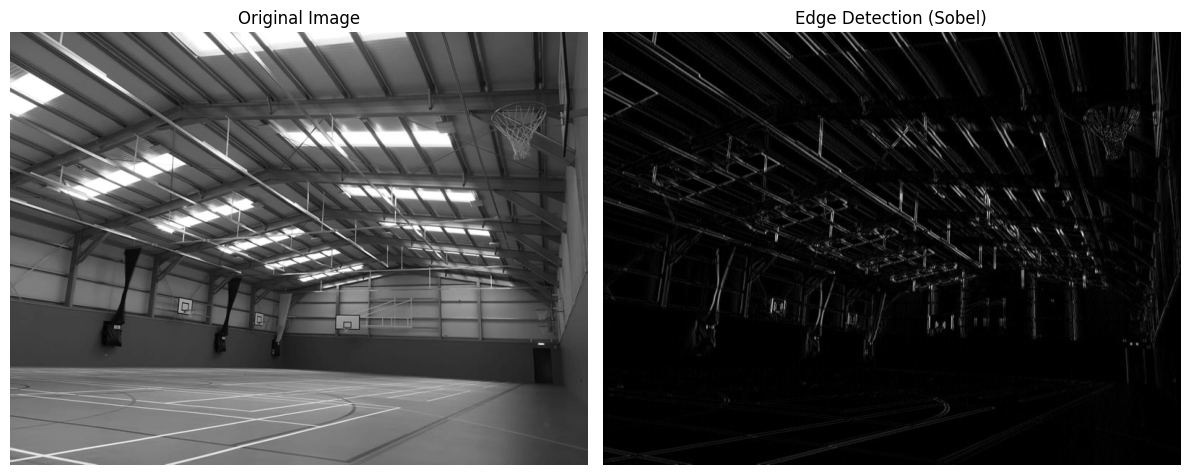

In [ ]:
# Edge detection
import numpy as np
from scipy.ndimage import sobel, gaussian_filter, grey_dilation
from scipy.ndimage import convolve


image_array = np.array(image.convert("L"))
image_array = np.array(image_array, dtype=np.float32) / 255.0  # Convert to float32

sigma = 0.4  # Control the level of smoothing (lower for finer details, higher for smoother)
smoothed_image = gaussian_filter(image_array, sigma=sigma)


prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])  # Horizontal edges
prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])   # Vertical edges

edges_x = convolve(smoothed_image, prewitt_x)
edges_y = convolve(smoothed_image, prewitt_y)

# Combine the two Sobel results to get edge magnitude
edges = np.hypot(edges_x, edges_x)  # Compute magnitude of gradient

# Display the original and edge-detected images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image.convert("L"), cmap='gray')
axes[0].axis('off')
axes[0].set_title("Original Image")

axes[1].imshow(edges, cmap='gray')
axes[1].axis('off')
axes[1].set_title("Edge Detection (Sobel)")

plt.tight_layout()
plt.show()


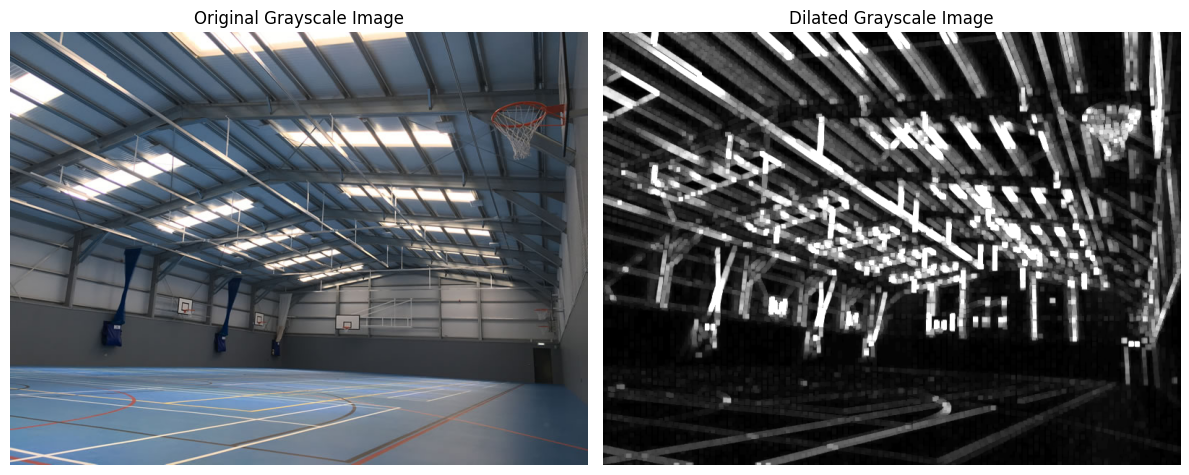

In [ ]:
structuring_element = np.ones((5, 5), dtype=np.float32)

dilated_image = grey_dilation(edges, structure=structuring_element)

dilated_image = (dilated_image - np.min(dilated_image)) / (np.max(dilated_image) - np.min(dilated_image))
dilated_image *= 3
dilated_image[dilated_image > 1] = 1

# Visualize the original and dilated images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(image, cmap='gray')
axes[0].axis('off')
axes[0].set_title("Original Grayscale Image")

axes[1].imshow(dilated_image, cmap='gray')
axes[1].axis('off')
axes[1].set_title("Dilated Grayscale Image")

plt.tight_layout()
plt.show()


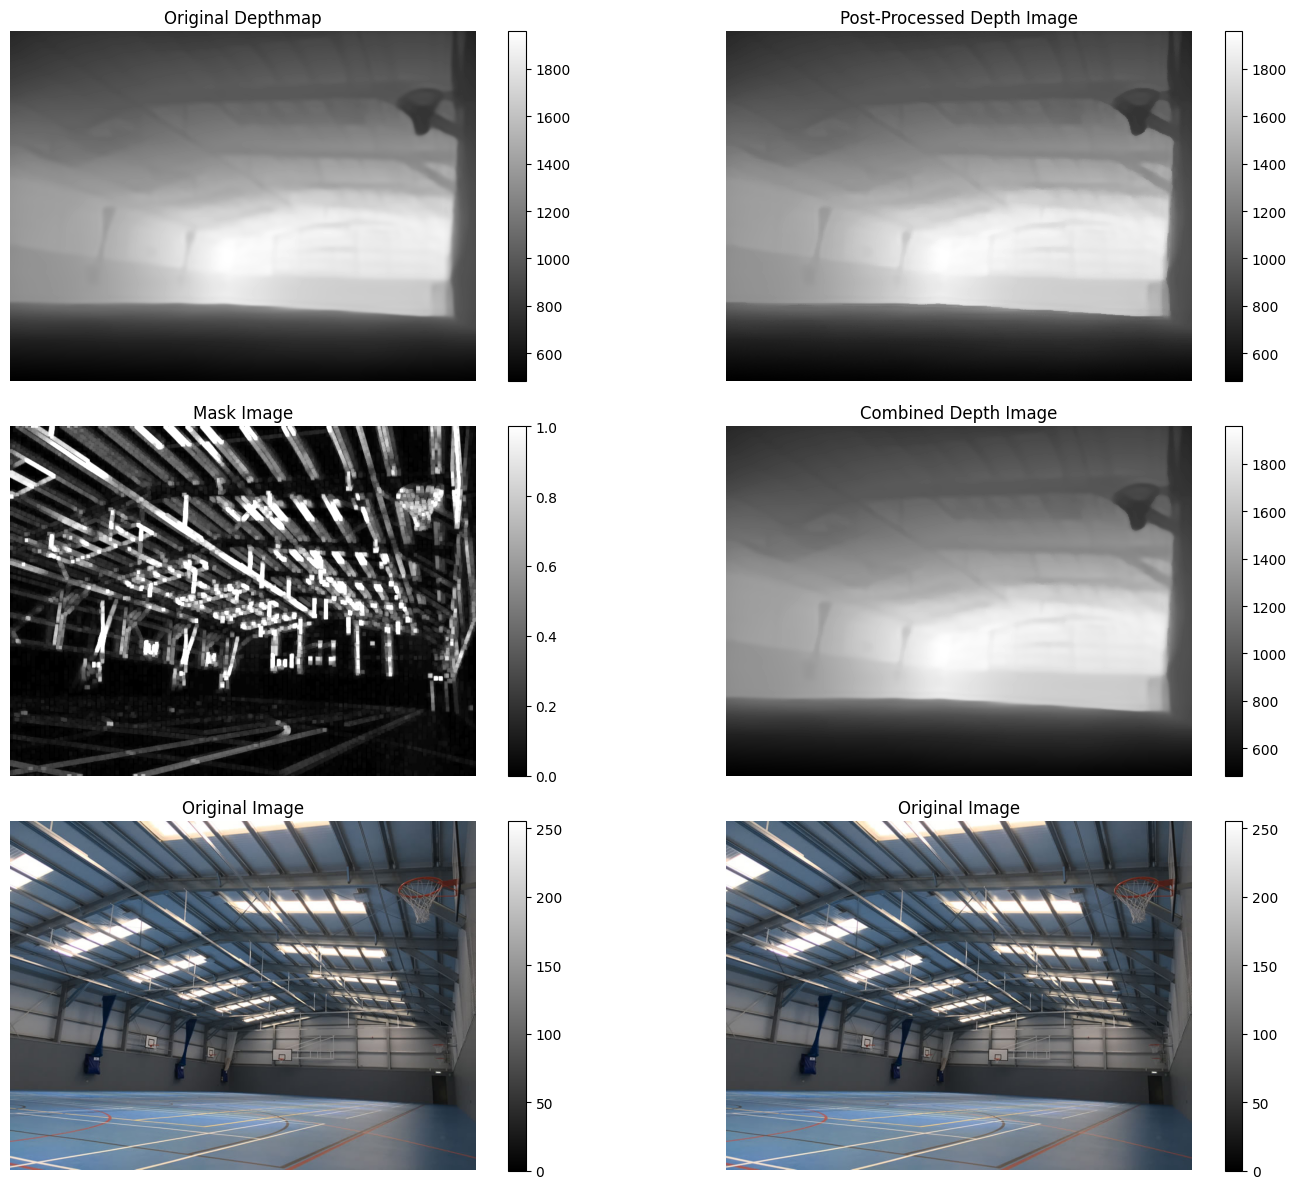

In [ ]:
# sharpen and overlay
from PIL import ImageFilter, ImageEnhance
from scipy.ndimage import generic_filter

# Custom function to apply the min-max filter
def min_max_filter(values):
    center_value = values[len(values) // 2]
    min_value = np.min(values)
    max_value = np.max(values)

    # Choose the value (min or max) that is closest to the center_value
    if abs(center_value - min_value) <= abs(center_value - max_value):
        return min_value
    else:
        return max_value

depth_array = np.array(depth_pil, dtype=np.float32)  # Retain precision as float32

filtered_image = generic_filter(depth_pil, min_max_filter, size=3)

result_array = dilated_image * filtered_image + (1 - dilated_image) * depth_array

fig, axes = plt.subplots(3, 2, figsize=(16, 12))

im0 = axes[0,0].imshow(depth_pil, cmap='gray')
axes[0,0].axis('off')
axes[0,0].set_title("Original Depthmap")
plt.colorbar(im0, ax=axes[0,0], fraction=0.046, pad=0.04)

im1 = axes[0,1].imshow(filtered_image, cmap='gray')
axes[0,1].axis('off')
axes[0,1].set_title("Post-Processed Depth Image")
plt.colorbar(im1, ax=axes[0,1], fraction=0.046, pad=0.04)

im2 = axes[1,0].imshow(dilated_image, cmap='gray')
axes[1,0].axis('off')
axes[1,0].set_title("Mask Image")
plt.colorbar(im2, ax=axes[1,0], fraction=0.046, pad=0.04)

im3 = axes[1,1].imshow(result_array, cmap='gray')
axes[1,1].axis('off')
axes[1,1].set_title("Combined Depth Image")
plt.colorbar(im3, ax=axes[1,1], fraction=0.046, pad=0.04)

im4 = axes[2,0].imshow(image, cmap='gray')
axes[2,0].axis('off')
axes[2,0].set_title("Original Image")
plt.colorbar(im4, ax=axes[2,0], fraction=0.046, pad=0.04)

im5 = axes[2,1].imshow(image, cmap='gray')
axes[2,1].axis('off')
axes[2,1].set_title("Original Image")
plt.colorbar(im5, ax=axes[2,1], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()


### Playing around with FFT

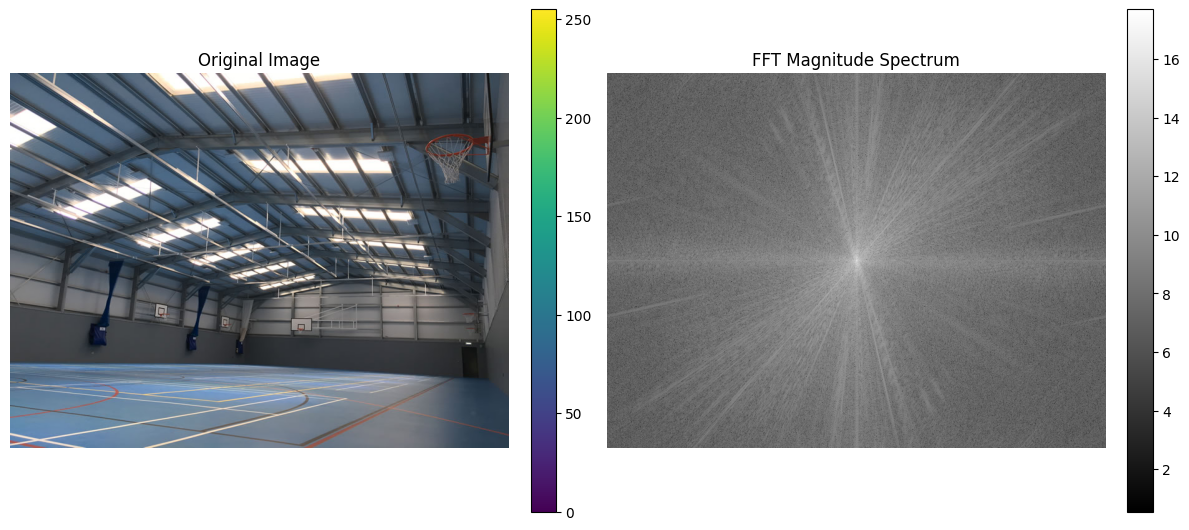

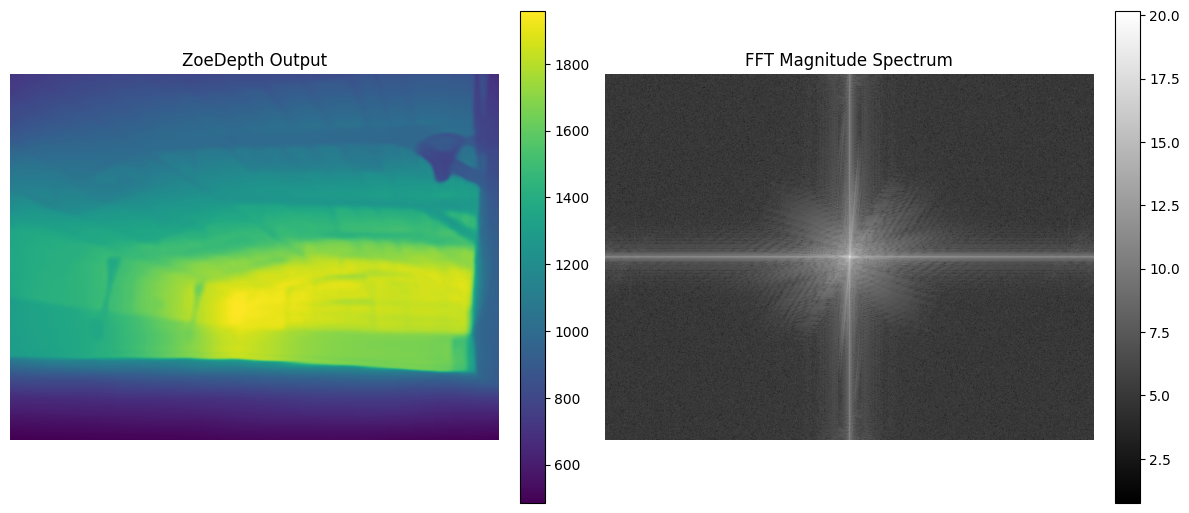

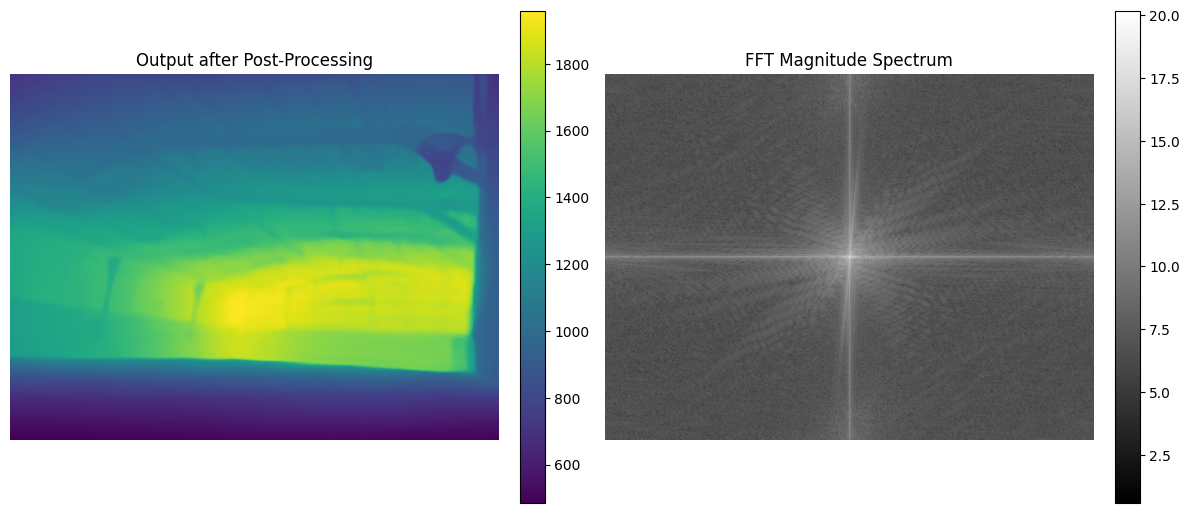

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def display_image_and_fft(image, title="Original Image"):
    """
    Displays an image and its FFT magnitude spectrum side by side.

    Args:
        image (np.array or PIL.Image.Image): The input image in grayscale or RGB.
    """
    # Convert image to grayscale if it's in RGB
    if len(image.shape) == 3:  # RGB image
        image_grey = np.mean(image, axis=-1)
    else:
      image_grey = image

    # Compute FFT and shift zero frequency component to the center
    fft = np.fft.fft2(image_grey)
    fft_shift = np.fft.fftshift(fft)
    magnitude_spectrum = np.log(np.abs(fft_shift) + 1)  # Log scale for visualization

    # Plot the original image and its FFT
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Display the original image
    im0 = axes[0].imshow(image)
    axes[0].set_title(title)
    axes[0].axis("off")
    plt.colorbar(im0, ax=axes[0], fraction=0.046, pad=0.04)

    # Display the magnitude spectrum of the FFT
    im1 = axes[1].imshow(magnitude_spectrum, cmap='gray')
    axes[1].set_title("FFT Magnitude Spectrum")
    axes[1].axis("off")
    plt.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04)

    plt.tight_layout()
    plt.show()


display_image_and_fft(np.array(image))
display_image_and_fft(depth_array, "ZoeDepth Output")
display_image_and_fft(result_array, "Output after Post-Processing")

### Resulting Process

In [12]:
import numpy as np
from scipy.ndimage import sobel, gaussian_filter, grey_dilation
from scipy.ndimage import convolve
from PIL import ImageFilter, ImageEnhance
from scipy.ndimage import generic_filter


def sharpened_pred(image, sharpening_filter_size=5, edge_area_size=5):
  # Normal prediction
  depth_pil = zoe.infer_pil(image, output_type="pil")

  # edge detection
  image_array = np.array(image.convert("L"))
  image_array = np.array(image_array, dtype=np.float32) / 255.0  # Convert to float32

  sigma = 0.4  # Control the level of smoothing (lower for finer details, higher for smoother)
  smoothed_image = gaussian_filter(image_array, sigma=sigma)

  prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])  # Horizontal edges
  prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])   # Vertical edges

  edges_x = convolve(smoothed_image, prewitt_x)
  edges_y = convolve(smoothed_image, prewitt_y)
  # Combine the two Sobel results to get edge magnitude
  edges = np.hypot(edges_x, edges_x)  # Compute magnitude of gradient

  # Dilation
  structuring_element = np.ones((edge_area_size, edge_area_size), dtype=np.float32)

  dilated_image = grey_dilation(edges, structure=structuring_element)
  dilated_image = (dilated_image - np.min(dilated_image)) / (np.max(dilated_image) - np.min(dilated_image))
  dilated_image *= 3
  dilated_image[dilated_image > 1] = 1

  # Custom function to apply the min-max filter
  def min_max_filter(values):
      center_value = values[len(values) // 2]
      min_value = np.min(values)
      max_value = np.max(values)

      # Choose the value (min or max) that is closest to the center_value
      if abs(center_value - min_value) <= abs(center_value - max_value):
          return min_value
      else:
          return max_value

  # Load the 16-bit PIL image and convert it to a NumPy array

  depth_array = np.array(depth_pil, dtype=np.float32)  # Retain precision as float32

  filtered_image = generic_filter(depth_pil, min_max_filter, size=sharpening_filter_size)

  result_array = dilated_image * filtered_image + (1 - dilated_image) * depth_array
  return result_array, depth_array



### Visualize

In [ ]:
import numpy as np
import plotly.graph_objects as go
import cv2

def depth_to_point_cloud(depth_map, scale=1.0, focal_length=500, cx=None, cy=None):
    """
    Convert a depth map into a 3D point cloud.

    Args:
        depth_map (np.array): The depth map.
        scale (float): Scaling factor for depth values.
        focal_length (float): Focal length of the camera.
        cx, cy (float): Principal point of the camera (image center by default).

    Returns:
        np.array: Nx3 array of 3D points.
    """
    height, width = depth_map.shape

    # Default principal points (image center)
    if cx is None:
        cx = width / 2
    if cy is None:
        cy = height / 2

    # Create pixel grid
    x = np.arange(0, width)
    y = np.arange(0, height)
    xx, yy = np.meshgrid(x, y)

    # Unproject pixel grid to 3D space
    z = depth_map / scale  # Convert depth to meters
    x = (xx - cx) * z / focal_length
    y = (yy - cy) * z / focal_length

    # Stack into Nx3 array
    points = np.stack((x, y, z), axis=-1)
    return points.reshape(-1, 3)

def visualize_point_cloud_plotly(points, color_image=None):
    """
    Visualize a 3D point cloud interactively in a Jupyter/Colab notebook using Plotly.

    Args:
        points (np.array): Nx3 array of 3D points.
    """
    x = points[:, 0]
    z = - points[:, 1] # flipped for correct
    y = points[:, 2]

    # Normalize z for coloring
    if color_image is not None:
        # Ensure the color image matches the depth map dimensions
        color_image = np.array(color_image)

        h, w, _ = color_image.shape
        if len(points) != h * w:
            raise ValueError("Color image dimensions do not match the number of points in the point cloud.")

        # Flatten the color image
        colors = color_image.reshape(-1, 3) / 255.0  # Normalize to [0, 1]
        rgb_colors = ['rgb({},{},{})'.format(int(r*255), int(g*255), int(b*255)) for r, g, b in colors]
    else:
        # Default to depth-based coloring
        z_color = (z - np.min(z)) / (np.max(z) - np.min(z))
        rgb_colors = z_color  # Use depth for color if no color image is provided


    # Create a scatter3d plot
    fig = go.Figure(data=[go.Scatter3d(
        x=x, y=y, z=z,
        mode='markers',
        marker=dict(
            size=2,
            color=rgb_colors,  # Color by depth (z-value)
            # colorscale='Viridis',  # Colormap
            opacity=0.8
        )
    )])

    # Update layout for better viewing
    fig.update_layout(
        scene=dict(
            xaxis_title="X",
            yaxis_title="Y",
            zaxis_title="Z",
            aspectmode="data"  # Equal aspect ratio
        ),
        margin=dict(r=0, l=0, b=0, t=0)
    )

    fig.show()

# Convert to point cloud
point_cloud = depth_to_point_cloud(result_array, scale=1000.0, focal_length=500)

# Visualize in Plotly
visualize_point_cloud_plotly(point_cloud, image)

## Evaluation & Comparisons

In [17]:
def exp1_processing_fn(image):
    return sharpened_pred(image)

results = evaluate_with_processing(
    zoe=zoe,
    dataset=ds,
    processing_fn=exp1_processing_fn,
    max_samples=50,  # Change as needed
)

Processed 1/50 samples
Raw: MAE = 0.1065, RMSE = 0.1526
Processed: MAE = 0.1074, RMSE = 0.1546
Processed 2/50 samples
Raw: MAE = 0.0998, RMSE = 0.1477
Processed: MAE = 0.1006, RMSE = 0.1497
Processed 3/50 samples
Raw: MAE = 0.0967, RMSE = 0.1331
Processed: MAE = 0.0977, RMSE = 0.1352
Processed 4/50 samples
Raw: MAE = 0.0644, RMSE = 0.0997
Processed: MAE = 0.0652, RMSE = 0.1021
Processed 5/50 samples
Raw: MAE = 0.0897, RMSE = 0.1199
Processed: MAE = 0.0906, RMSE = 0.1224
Processed 6/50 samples
Raw: MAE = 0.0739, RMSE = 0.1110
Processed: MAE = 0.0748, RMSE = 0.1136
Processed 7/50 samples
Raw: MAE = 0.1154, RMSE = 0.1443
Processed: MAE = 0.1163, RMSE = 0.1466
Processed 8/50 samples
Raw: MAE = 0.1105, RMSE = 0.1413
Processed: MAE = 0.1113, RMSE = 0.1439
Processed 9/50 samples
Raw: MAE = 0.1138, RMSE = 0.1429
Processed: MAE = 0.1147, RMSE = 0.1454
Processed 10/50 samples
Raw: MAE = 0.0814, RMSE = 0.1151
Processed: MAE = 0.0826, RMSE = 0.1181
Processed 11/50 samples
Raw: MAE = 0.1229, RMSE =

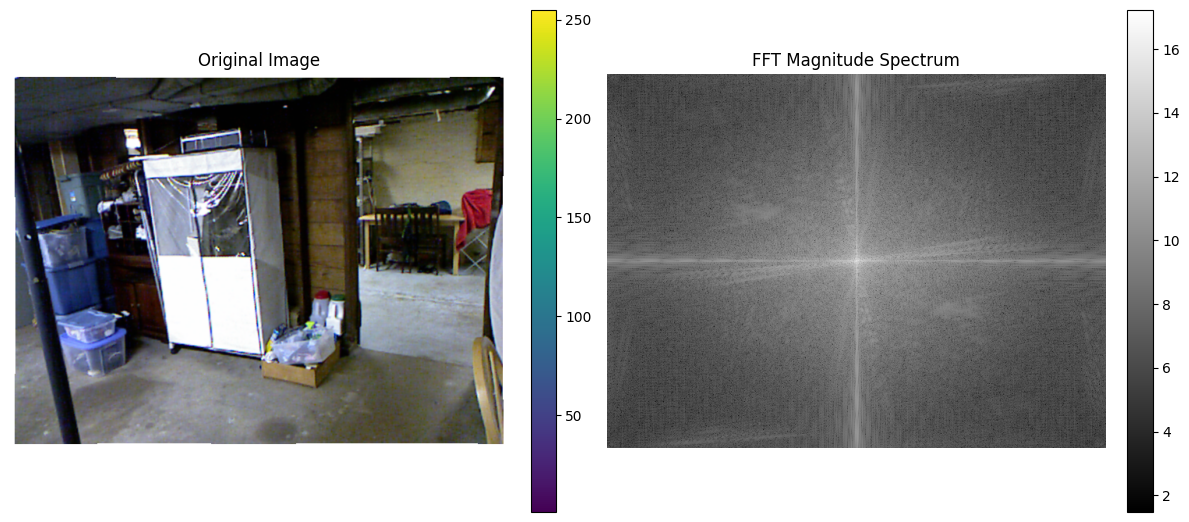

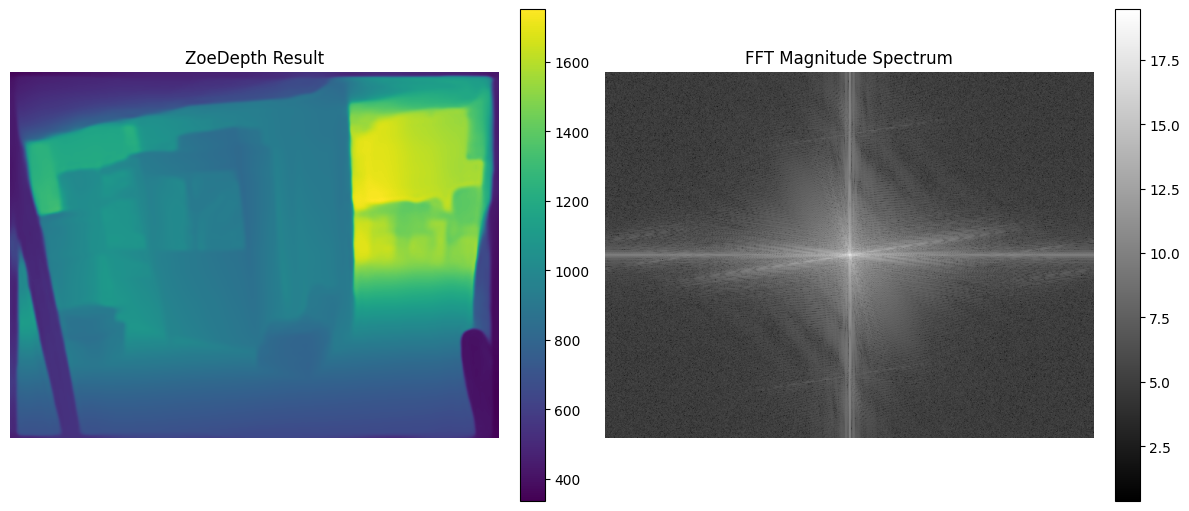

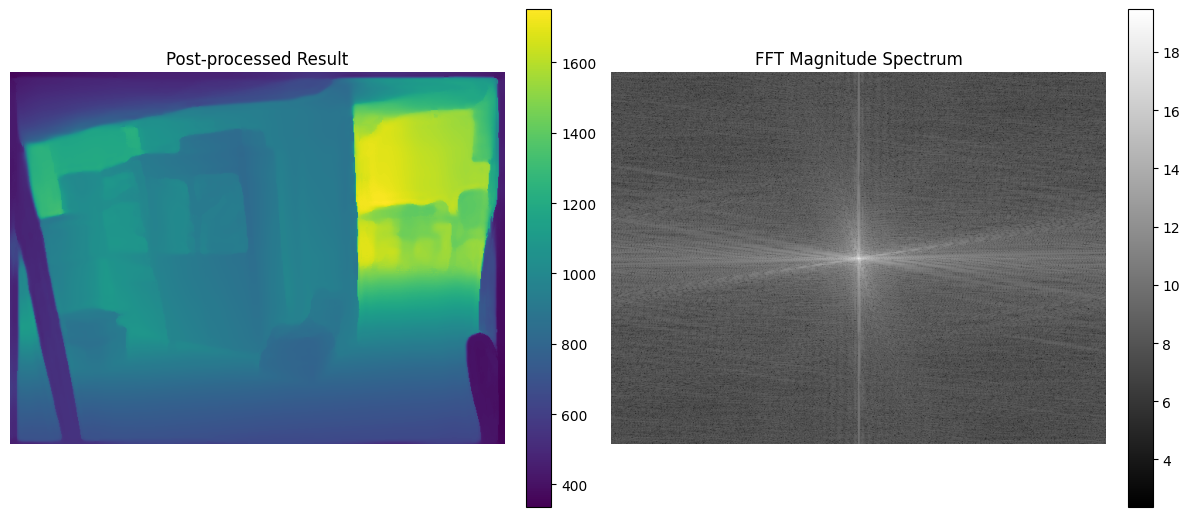

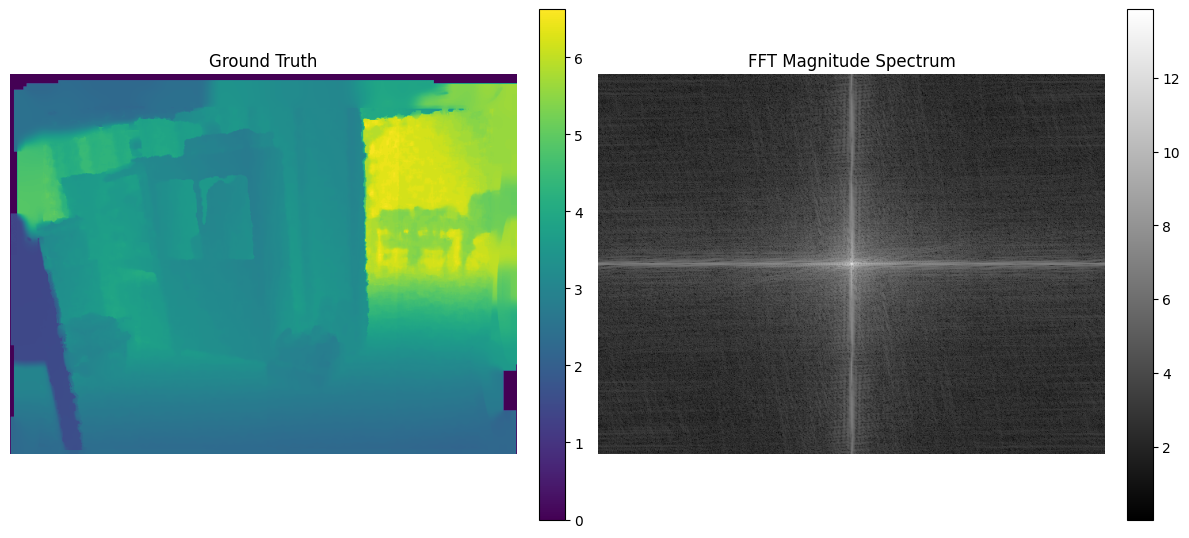

In [ ]:

from datasets import load_dataset

# Load the dataset
ds = load_dataset("sayakpaul/nyu_depth_v2", streaming=True, split="train", trust_remote_code=True)

# Select image number 11
# Function to get nth element
def get_nth_element(ds, n):
    i = 0
    while i <= n:
      result = next(iter(ds))
      i += 1  # Return the nth example
    return result  # Return None if n is out of range

# Get the nth element (e.g., the 11th element, which is index 10)
n = 0
image_data = get_nth_element(ds, n)
# print(image_data)


# Retrieve the RGB image and depth ground truth
rgb_image = np.array(image_data['image'].convert("RGB"))
ground_truth_depth = np.array(image_data['depth_map'])


sharpened_result, standard_output = sharpened_pred(image_data['image'].convert("RGB"))

display_image_and_fft(rgb_image, "Original Image")
display_image_and_fft(standard_output, "ZoeDepth Result")
display_image_and_fft(sharpened_result, "Post-processed Result")
display_image_and_fft(ground_truth_depth, "Ground Truth")


## Experiment 2
Applying ZoeDepth on patches with a sliding window proves better accuracy (but slower performance), as in the case of [PatchFusion](https://zhyever.github.io/patchfusion/images/paper.pdf).
The hypothesis of this approach is to apply the concept of patches but with distinct objects, thus the number of "patches" in this case is variable, and is as needed. The more objects in the scene, the more accuracy will be needed around them.


 - Blob detection
 - Extract separate blobs
 - Apply depth detection on them separately
 - Then combine with full img result. Adapting depth levels accordingly

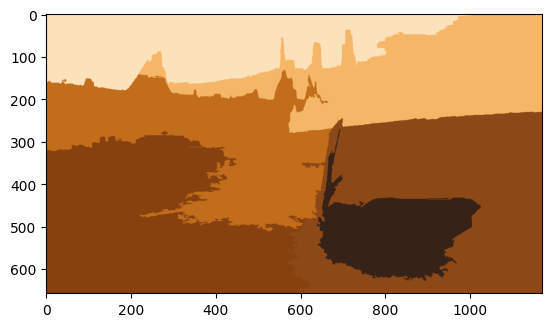

In [4]:
from skimage.segmentation import slic
from skimage.color import label2rgb
import matplotlib.pyplot as plt
from skimage.io import imread
from torchvision.transforms import ToTensor, Resize, Compose
import numpy as np
import cv2

# image = imread("blade runner.jpg")
url = "https://www.intofilm.org/intofilm-production/3911/scaledcropped/1170x658/resources/3911/blade-runner-2049-ruins.jpg"

# Fetch the image from the URL
response = requests.get(url)
response.raise_for_status()

image = Image.open(BytesIO(response.content))
image = image.convert("RGB")
# Convert to NumPy array
image_np = np.array(image)

segments = slic(image_np, n_segments=10, compactness=10, start_label=1)
segmented_image = label2rgb(segments, image_np, kind='avg')

plt.imshow(segmented_image)
plt.show()

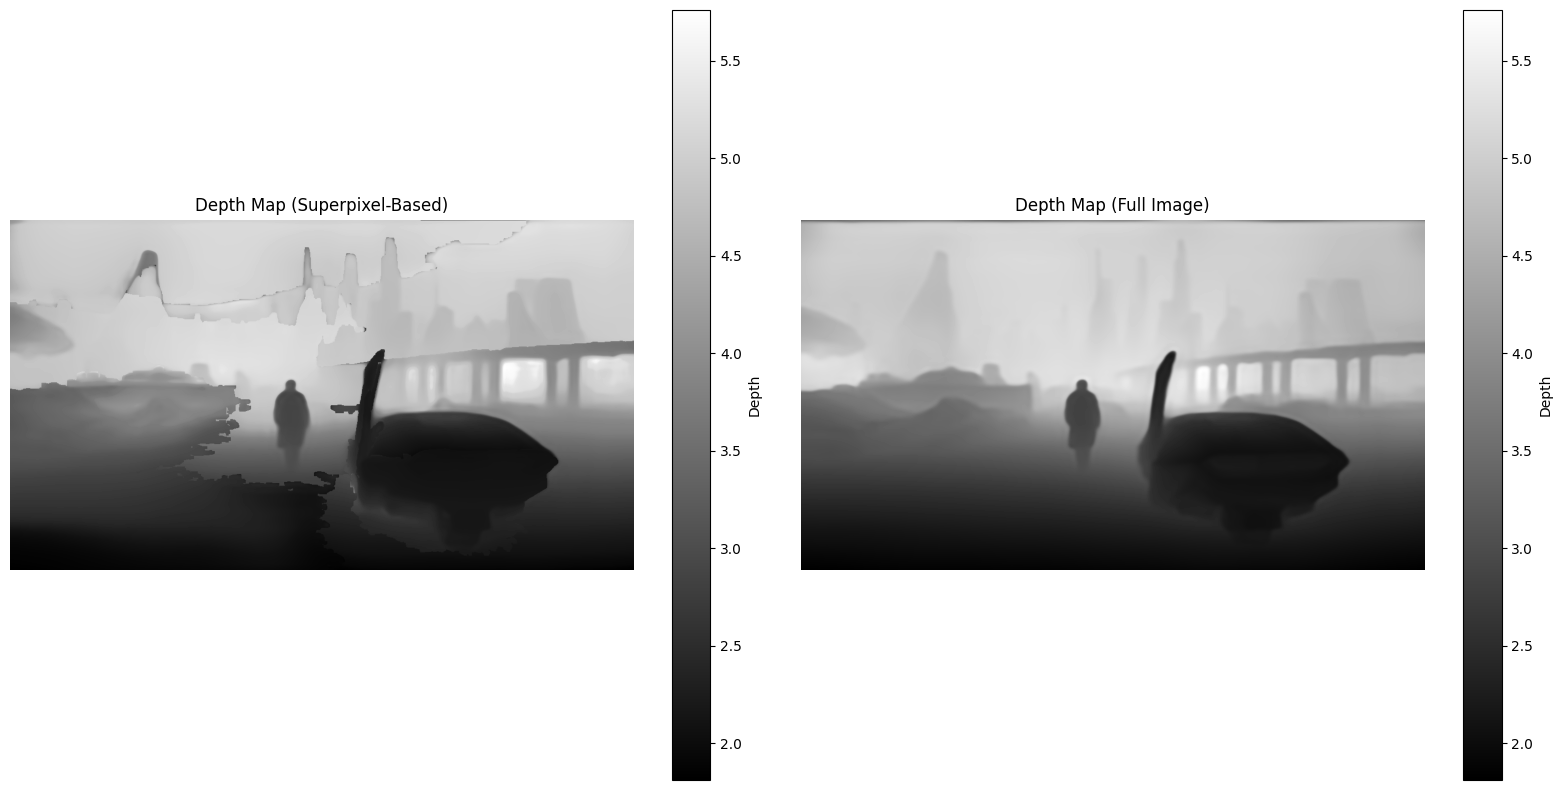

In [8]:
from skimage.morphology import dilation, square
from skimage.exposure import match_histograms


unique_segments = np.unique(segments)
depth_results = np.zeros(segments.shape, dtype=np.float32)

transform = Compose([Resize((384, 384)), ToTensor()])

with torch.no_grad():
    # Convert the full image to ZoeDepth's input format
    image_pil = Image.fromarray(image_np)
    full_image_tensor = transform(image_pil).unsqueeze(0).to(DEVICE)

    # Infer depth for the entire image
    full_depth_map = zoe.infer_pil(image, output_type="numpy")


for segment_id in unique_segments:

    # Example of expanding a superpixel mask
    expanded_segments = dilation(segments == segment_id, square(5))
    extra_dilation = dilation(expanded_segments, square(5))
    patch_with_context = image_np * extra_dilation[:, :, np.newaxis]
    # make the patch dialate by an extra 3 pixels
    # Mask for the current superpixel
    mask = segments == segment_id
    # patch = image_np * mask[:, :, np.newaxis]  # Apply mask to extract the patch

    # Resize the patch to the input size of ZoeDepth
    patch_pil = Image.fromarray(patch_with_context.astype(np.uint8))
    patch_tensor = transform(patch_pil).unsqueeze(0).to(DEVICE)

    # Predict depth for the patch
    depth_map = zoe.infer_pil(patch_pil, output_type="numpy")

    # Resize the depth map back to the original image size
    # depth_resized = cv2.resize(depth_map, (image_np.shape[1], image_np.shape[0]))
    # Normalize and match histograms to blend properly
    depth_map[expanded_segments] = match_histograms(depth_map[expanded_segments], full_depth_map[expanded_segments])


    # Assign depth values to the region corresponding to the superpixel
    depth_results[expanded_segments] = depth_map[expanded_segments]


# Resize the full depth map back to the original image size
full_depth_map_resized = cv2.resize(full_depth_map, (image_np.shape[1], image_np.shape[0]))

# Step 5: Visualize Both Depth Maps Side-by-Side
plt.figure(figsize=(16, 8))

# Superpixel-based depth map
plt.subplot(1, 2, 1)
plt.imshow(depth_results, cmap='gray')
plt.colorbar(label='Depth')
plt.title("Depth Map (Superpixel-Based)")
plt.axis('off')

# Full image depth map
plt.subplot(1, 2, 2)
plt.imshow(full_depth_map_resized, cmap='gray')
plt.colorbar(label='Depth')
plt.title("Depth Map (Full Image)")
plt.axis('off')

plt.tight_layout()
plt.show()

### Function for Superpixel Segmentation Depth Estimation

In [9]:
from skimage.segmentation import slic
from skimage.color import label2rgb
from skimage.morphology import dilation, square
from torchvision.transforms import ToTensor, Resize, Compose
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import torch

# Define the processing function
def process_with_superpixels(image, n_segments=10, compactness=10, dilation_size=5):
    """
    Process an image using superpixel segmentation and ZoeDepth.

    Args:
    - image (PIL.Image or ndarray): Input image to process.
    - zoe: ZoeDepth model instance.
    - device: Torch device (e.g., 'cuda' or 'cpu').
    - n_segments (int): Number of superpixels for SLIC segmentation.
    - compactness (float): Compactness parameter for SLIC.
    - dilation_size (int): Size of the dilation kernel for expanding superpixel masks.

    Returns:
    - tuple: (normal_depth_map, superpixel_depth_map)
    """

    # Ensure the image is a NumPy array
    if isinstance(image, Image.Image):
        image_np = np.array(image)
    else:
        image_np = image

    depth_pil = zoe.infer_pil(image, output_type="pil")
    depth_array = np.array(depth_pil, dtype=np.float32)  # Retain precision as float32

    # Apply SLIC superpixel segmentation
    segments = slic(image_np, n_segments=n_segments, compactness=compactness, start_label=1)

    # Prepare output for superpixel depth results
    depth_results = np.zeros(segments.shape, dtype=np.float32)

    # Define transformation for ZoeDepth input
    transform = Compose([Resize((384, 384)), ToTensor()])

    # Iterate over unique superpixel segments
    unique_segments = np.unique(segments)


    # Predict the full depth map for the original image
    image_pil = Image.fromarray(image_np)
    full_depth_map = zoe.infer_pil(image_pil, output_type="numpy")


    for segment_id in unique_segments:
        # Expand the current superpixel mask
        expanded_segments = dilation(segments == segment_id, square(dilation_size))
        extra_dilation = dilation(expanded_segments, square(5))
        patch_with_context = image_np * extra_dilation[:, :, np.newaxis]


        # Convert the patch to PIL format and transform
        patch_pil = Image.fromarray(patch_with_context.astype(np.uint8))
        patch_tensor = transform(patch_pil).unsqueeze(0).to(DEVICE)

        # Predict depth for the patch
        depth_map = zoe.infer_pil(patch_pil, output_type="numpy")

        # # Resize the depth map back to the original image size
        # depth_resized = cv2.resize(depth_map, (image_np.shape[1], image_np.shape[0]))

        # Normalize and match histograms to blend properly
        depth_map[expanded_segments] = match_histograms(depth_map[expanded_segments], full_depth_map[expanded_segments])

        # Assign depth values to the expanded superpixel region
        depth_results[expanded_segments] = depth_map[expanded_segments]


    return depth_results, depth_array


### Evaluation

In [14]:
def exp2_processing_fn(image):
    return process_with_superpixels(image)

results = evaluate_with_processing(
    zoe=zoe,
    dataset=ds,
    processing_fn=exp2_processing_fn,
    max_samples=50,
)

Processed 1/50 samples
Raw: MAE = 0.1065, RMSE = 0.1526
Processed: MAE = 0.1040, RMSE = 0.1537
Processed 2/50 samples
Raw: MAE = 0.0998, RMSE = 0.1477
Processed: MAE = 0.1016, RMSE = 0.1589
Processed 3/50 samples
Raw: MAE = 0.0967, RMSE = 0.1331
Processed: MAE = 0.1040, RMSE = 0.1446
Processed 4/50 samples
Raw: MAE = 0.0644, RMSE = 0.0997
Processed: MAE = 0.0951, RMSE = 0.1463
Processed 5/50 samples
Raw: MAE = 0.0897, RMSE = 0.1199
Processed: MAE = 0.1301, RMSE = 0.1715
Processed 6/50 samples
Raw: MAE = 0.0739, RMSE = 0.1110
Processed: MAE = 0.0927, RMSE = 0.1349
Processed 7/50 samples
Raw: MAE = 0.1154, RMSE = 0.1443
Processed: MAE = 0.1316, RMSE = 0.1745
Processed 8/50 samples
Raw: MAE = 0.1105, RMSE = 0.1413
Processed: MAE = 0.1203, RMSE = 0.1682
Processed 9/50 samples
Raw: MAE = 0.1138, RMSE = 0.1429
Processed: MAE = 0.1224, RMSE = 0.1655
Processed 10/50 samples
Raw: MAE = 0.0814, RMSE = 0.1151
Processed: MAE = 0.1111, RMSE = 0.1507
Processed 11/50 samples
Raw: MAE = 0.1229, RMSE =



```
# This is formatted as code
```

## Experiment 3

Apply the patch inference on patches with high-frequency details, and combine with base result.

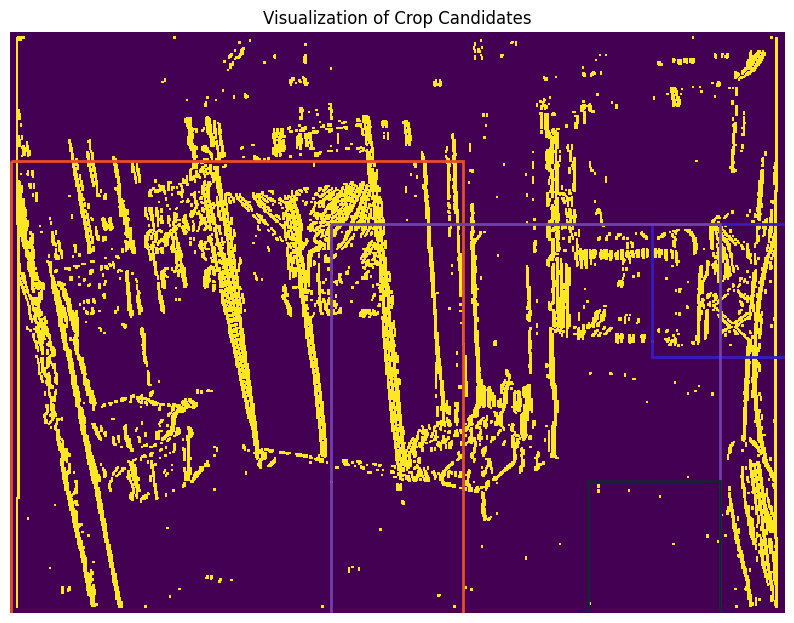

In [ ]:
import numpy as np
from scipy.ndimage import binary_opening, generate_binary_structure
from skimage.morphology import disk, square

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math
import random
import numpy as np
import math
from scipy.ndimage import binary_opening, generate_binary_structure
from skimage.morphology import disk, square
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

def remove_overlapping_candidates(candidates, iou_threshold=0.3):
    """
    Remove overlapping candidates using IoU to ensure non-overlapping boxes.

    Parameters:
        candidates (list of tuples): List of crop candidates (center_x, center_y, width, height, density).
        iou_threshold (float): Maximum allowed IoU between boxes to consider them as non-overlapping.

    Returns:
        list of tuples: Refined non-overlapping candidates.
    """
    def compute_iou(box_a, box_b):
        """
        Compute the Intersection over Union (IoU) of two boxes.

        Parameters:
            box_a, box_b (tuple): Boxes defined as (center_x, center_y, width, height, density).

        Returns:
            float: IoU value between the two boxes.
        """
        # Extract box coordinates
        x1_a, y1_a, w_a, h_a, _ = box_a
        x1_b, y1_b, w_b, h_b, _ = box_b

        # Convert center-based to corner-based coordinates
        x1_min, y1_min = x1_a - w_a / 2, y1_a - h_a / 2
        x1_max, y1_max = x1_a + w_a / 2, y1_a + h_a / 2

        x2_min, y2_min = x1_b - w_b / 2, y1_b - h_b / 2
        x2_max, y2_max = x1_b + w_b / 2, y1_b + h_b / 2

        # Compute intersection box
        inter_x_min = max(x1_min, x2_min)
        inter_y_min = max(y1_min, y2_min)
        inter_x_max = min(x1_max, x2_max)
        inter_y_max = min(y1_max, y2_max)

        # Compute intersection area
        inter_width = max(0, inter_x_max - inter_x_min)
        inter_height = max(0, inter_y_max - inter_y_min)
        intersection_area = inter_width * inter_height

        # Compute union area
        area_a = w_a * h_a
        area_b = w_b * h_b
        union_area = abs(area_a + area_b - intersection_area)

        # Compute IoU
        return intersection_area / union_area if union_area > 0 else 0

    # Sort candidates by density in descending order
    candidates = sorted(candidates, key=lambda x: x[4], reverse=True)

    # Keep only non-overlapping boxes
    filtered_candidates = []
    while candidates:
        current = candidates.pop(0)
        filtered_candidates.append(current)

        # Filter out candidates with high IoU with the current box
        candidates = [c for c in candidates if compute_iou(current, c) < iou_threshold]

    return filtered_candidates

# Use this function in the dynamic_patch_selection where appropriate



def dynamic_patch_selection(gradient_map, opening_size=2, threshold=0.2, stride=10, target_density=0.05, max_iters=3):
    """
    Dynamically adjust patch sizes based on the density of high-frequency components.

    Parameters:
        gradient_map (numpy.ndarray): 2D array representing the gradient map.
        threshold (float): Threshold for high-frequency selection.
        stride (int): Stride for initial scanning.
        target_density (tuple): Desired range of density (min_density, max_density).
        max_iters (int): Maximum iterations for dynamic adjustment.

    Returns:
        list of tuples: Each tuple is (center_x, center_y, patch_width, patch_height, density).
    """
    # Create the structuring element
    structuring_element = 'square'
    if structuring_element == 'disk':
        struct_elem = disk(opening_size)
    elif structuring_element == 'square':
        struct_elem = square(opening_size)
    else:
        raise ValueError("Invalid structuring element. Use 'disk' or 'square'.")

    # Create binary mask and apply morphological opening
    if gradient_map.ndim == 3:  # Convert RGB to grayscale
      gradient_map = np.mean(gradient_map, axis=-1) # normalize from 0 to 1

    gradient_map = (gradient_map - np.min(gradient_map)) / (np.max(gradient_map) - np.min(gradient_map) + 1e-8)
    binary_mask = gradient_map > threshold
    binary_mask = binary_opening(binary_mask, structure=struct_elem)
    # binary_mask = binary_opening(binary_mask, structure=struct_elem)
    # binary_mask = binary_opening(binary_mask, structure=struct_elem)

    crop_candidates = []
    initial_patch_size = math.floor(min(gradient_map.shape))
    stride = int(max(gradient_map.shape) / 12)

    for x_start in range(0, gradient_map.shape[0], stride):
        for y_start in range(0, gradient_map.shape[1], stride):

            patch_size = initial_patch_size
            iters = 0
            while iters < max_iters:
                patch_size = int(patch_size)  # Ensure integer patch size
                x_end = min(x_start + patch_size, gradient_map.shape[0])
                y_end = min(y_start + patch_size, gradient_map.shape[1])
                #  apply min patch_size
                if abs(x_start - x_end) < 80 or abs(y_start - y_end) < 80:
                  break


                # Extract patch
                patch = binary_mask[x_start:x_end, y_start:y_end]
                density = np.sum(patch) / (patch.shape[0] * patch.shape[1])

                # Check density and adjust patch size
                if target_density <= density:
                    center_x = (x_start + x_end) // 2
                    center_y = (y_start + y_end) // 2
                    crop_candidates.append((center_x, center_y, abs(x_end - x_start), abs(y_end - y_start), density))
                    break
                # elif density < target_density[0]:
                patch_size = max(patch_size - int(patch_size * 0.2), 500)  # Shrink patch size
                # elif density > target_density[1]:
                #     patch_size = min(patch_size + int(patch_size * 0.2), gradient_map.shape[0], gradient_map.shape[1])  # Expand patch size

                iters += 1

    # Remove overlapping candidates
    crop_candidates = remove_overlapping_candidates(crop_candidates)

    # Sort by density (descending) and take the top 10
    crop_candidates = sorted(crop_candidates, key=lambda x: x[4], reverse=True)[:10]

    return crop_candidates, binary_mask

def visualize_candidates(gradient_map, candidates, figsize=(10, 10)):
    """
    Visualize crop candidates on the gradient map.

    Parameters:
        gradient_map (numpy.ndarray): 2D array representing the gradient map.
        candidates (list of tuples): Each tuple is (center_x, center_y, width, height, density).
        figsize (tuple): Figure size for the plot.
    """
    fig, ax = plt.subplots(figsize=figsize)

    # Display the gradient map
    ax.imshow(gradient_map, cmap='viridis', interpolation='nearest')
    ax.set_title("Visualization of Crop Candidates")
    ax.axis("off")

    # Overlay rectangles for each candidate
    for candidate in candidates:
        center_x, center_y, width, height, _ = candidate  # Extract candidate details

        # Calculate top-left corner from center coordinates
        x_start = center_x - width / 2
        y_start = center_y - height / 2

        # Generate a random color for the rectangle
        random_color = (random.random(), random.random(), random.random())

        # Add the rectangle to the plot
        rect = patches.Rectangle(
            (y_start, x_start),  # (x, y) in the image's coordinate system
            width,               # Rectangle width
            height,              # Rectangle height
            linewidth=2,
            edgecolor=random_color,
            facecolor='none'
        )
        ax.add_patch(rect)

    plt.show()

smoothed_image = gaussian_filter(rgb_image, sigma=0.5)
if smoothed_image.ndim == 3:  # Check if the image has multiple channels (e.g., RGB)
  smoothed_image = np.mean(image_np, axis=-1)  # Convert to grayscale by averaging channels

prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])  # Horizontal edges
prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])   # Vertical edges

edges_x = convolve(smoothed_image, prewitt_x)
edges_y = convolve(smoothed_image, prewitt_y)
# Combine the two Sobel results to get edge magnitude
edges = np.hypot(edges_x, edges_x)
candidates, mask = dynamic_patch_selection(edges, threshold=0.05, target_density=0.05, max_iters=5)
visualize_candidates(mask, candidates[:10])

before 83
candidates
after 4
candidates
after 4
Image dimensions: (480, 640)


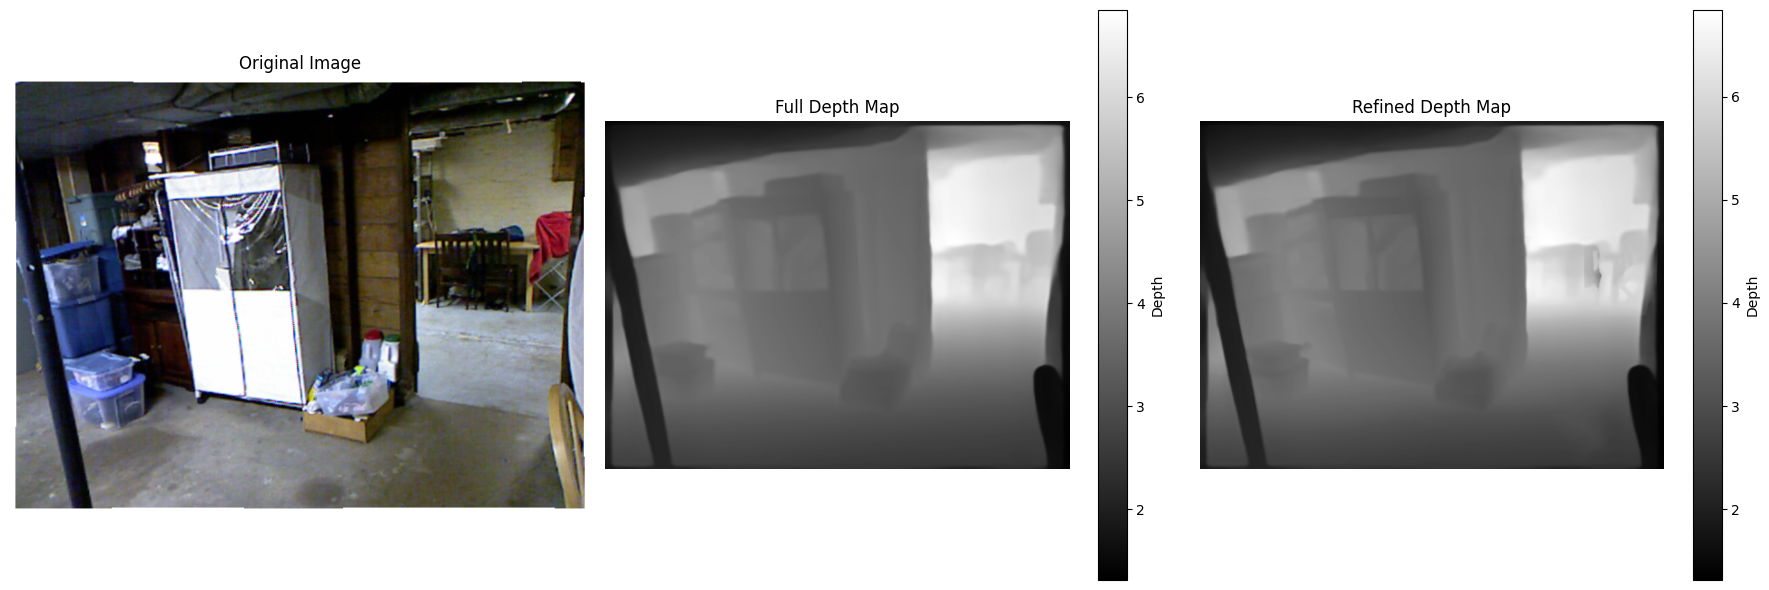

In [ ]:
import numpy as np
from skimage.morphology import dilation, square
from torchvision.transforms import Compose, Resize, ToTensor
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from skimage.exposure import match_histograms


def enhance_depth_with_crops(image_np, smoothing=0.5, device="cpu"):
    """
    Enhances a full-sized depth map by refining it with detailed depth predictions from cropped regions.

    Parameters:
        image_np (PIL.Image or numpy.ndarray): The input image.
        smoothing (float): Smoothing sigma for edge detection (to reduce noise).
        device (str): The device to run the inference on ("cpu" or "cuda").

    Returns:
        numpy.ndarray: Enhanced depth map of the same size as the input image.
    """
    # Convert PIL image to NumPy array if necessary
    if isinstance(image_np, Image.Image):
        image_np = np.array(image_np)

    # Ensure image is RGB
    if image_np.ndim == 2 or image_np.shape[2] == 1:
        image_np = cv2.cvtColor(image_np, cv2.COLOR_GRAY2RGB)

    sigma = 0.4  # Control the level of smoothing (lower for finer details, higher for smoother)
    smoothed_image = gaussian_filter(image_np, sigma=smoothing)
    if smoothed_image.ndim == 3:  # Convert to grayscale if the image has multiple channels (e.g., RGB)
        smoothed_image = np.mean(image_np, axis=-1)

    prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])  # Horizontal edges
    prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])   # Vertical edges

    edges_x = convolve(smoothed_image, prewitt_x)
    edges_y = convolve(smoothed_image, prewitt_y)
    edges = np.hypot(edges_x, edges_x)  # Compute magnitude of gradient

    candidates, _ = dynamic_patch_selection(edges, opening_size=2, threshold=0.05, stride=20, target_density=0.05, max_iters=5)

    transform = Compose([Resize((384, 384)), ToTensor()])
    original_h, original_w = image_np.shape[:2]

    # Infer depth for the entire image
    image_pil = Image.fromarray(image_np)
    full_depth_map = zoe.infer_pil(image_pil, output_type="numpy")

    # Create a refined depth map initialized with the full depth map
    refined_depth_map = np.copy(full_depth_map)

    for candidate in candidates:
        center_x, center_y, patch_width, patch_height, density = candidate

        # Calculate the crop box coordinates, ensuring they're within image bounds
        x_start = max(0, center_x - patch_width // 2)
        x_end = min(original_h, x_start + patch_height)
        y_start = max(0, center_y - patch_height // 2)
        y_end = min(original_w, y_start + patch_width)

        # Check if the crop is valid
        if x_start >= x_end or y_start >= y_end:
            continue

        # Extract the cropped patch
        crop_patch = image_np[x_start:x_end, y_start:y_end]

        if crop_patch.size == 0:  # Skip invalid crops
            continue

        # Resize the patch to the input size of ZoeDepth
        patch_pil = Image.fromarray(crop_patch)
        patch_tensor = transform(patch_pil).unsqueeze(0).to(device)

        # Predict depth for the patch
        crop_depth_resized = zoe.infer_pil(patch_pil, output_type="numpy")

        # Match the histogram of the patch to the corresponding region in the full depth map
        region_full_depth = full_depth_map[x_start:x_end, y_start:y_end]
        crop_depth_resized = match_histograms(crop_depth_resized, region_full_depth)

        # Blend the patch with the full depth map using a Gaussian-weighted mask
        patch_h, patch_w = crop_depth_resized.shape
        y, x = np.ogrid[:patch_h, :patch_w]
        center = (patch_h // 2, patch_w // 2)
        gaussian_mask = np.exp(-((x - center[1]) ** 2 + (y - center[0]) ** 2) / (2 * (min(patch_h, patch_w) // 4) ** 2))

        # Normalize the Gaussian mask
        gaussian_mask /= np.max(gaussian_mask)

        # Update the refined depth map
        refined_depth_map[x_start:x_end, y_start:y_end] = (
            refined_depth_map[x_start:x_end, y_start:y_end] * (1 - gaussian_mask) +
            crop_depth_resized * gaussian_mask
        )

    return refined_depth_map, full_depth_map

def visualize_depth_maps(original_image, full_depth_map, refined_depth_map):
    """
    Visualizes the original image, full depth map, and refined depth map side by side.

    Parameters:
        original_image (numpy.ndarray): The input image as a NumPy array (H, W, 3).
        full_depth_map (numpy.ndarray): The full depth map.
        refined_depth_map (numpy.ndarray): The refined depth map.
    """
    plt.figure(figsize=(18, 6))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(original_image)
    plt.title("Original Image")
    plt.axis("off")

    # Full depth map
    plt.subplot(1, 3, 2)
    plt.imshow(full_depth_map, cmap='gray')
    plt.colorbar(label='Depth')
    plt.title("Full Depth Map")
    plt.axis("off")

    # Refined depth map
    plt.subplot(1, 3, 3)
    plt.imshow(refined_depth_map, cmap='gray')
    plt.colorbar(label='Depth')
    plt.title("Refined Depth Map")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

image_np = rgb_image

# Enhance the depth map with the crops
refined_depth_map, full_depth_map = enhance_depth_with_crops(image_np)

# Visualize the results
visualize_depth_maps(image_np, full_depth_map, refined_depth_map)
# visualize_candidates(image_np, candidates[:10])

### Evaluation

In [ ]:
def exp3_processing_fn(image):
    return enhance_depth_with_crops(image)

results = evaluate_with_processing(
    zoe=zoe,
    dataset=ds,
    processing_fn=exp3_processing_fn,
    max_samples=50,
)

Image dimensions: (480, 640)
Processed 1/50 samples
Raw: MAE = 0.1064, RMSE = 0.1525
Processed: MAE = 0.1055, RMSE = 0.1507
Image dimensions: (480, 640)
Processed 2/50 samples
Raw: MAE = 0.0999, RMSE = 0.1478
Processed: MAE = 0.0990, RMSE = 0.1455
Image dimensions: (480, 640)
Processed 3/50 samples
Raw: MAE = 0.0967, RMSE = 0.1331
Processed: MAE = 0.0966, RMSE = 0.1330
Image dimensions: (480, 640)
Processed 4/50 samples
Raw: MAE = 0.0643, RMSE = 0.0996
Processed: MAE = 0.0636, RMSE = 0.0993
Image dimensions: (480, 640)
Processed 5/50 samples
Raw: MAE = 0.0897, RMSE = 0.1198
Processed: MAE = 0.0881, RMSE = 0.1188
Image dimensions: (480, 640)
Processed 6/50 samples
Raw: MAE = 0.0739, RMSE = 0.1110
Processed: MAE = 0.0744, RMSE = 0.1115
Image dimensions: (480, 640)
Processed 7/50 samples
Raw: MAE = 0.1155, RMSE = 0.1444
Processed: MAE = 0.1128, RMSE = 0.1426
Image dimensions: (480, 640)
Processed 8/50 samples
Raw: MAE = 0.1104, RMSE = 0.1412
Processed: MAE = 0.1077, RMSE = 0.1395
Image di

## (Mini) Experiment 4
Operating on the assumption that ZoeDepth may yield varying results based on the resolution of the image, this experiment uses the concept of multi-scale inference to apply the model on different scales of the image, averaging the result to get a combined map.

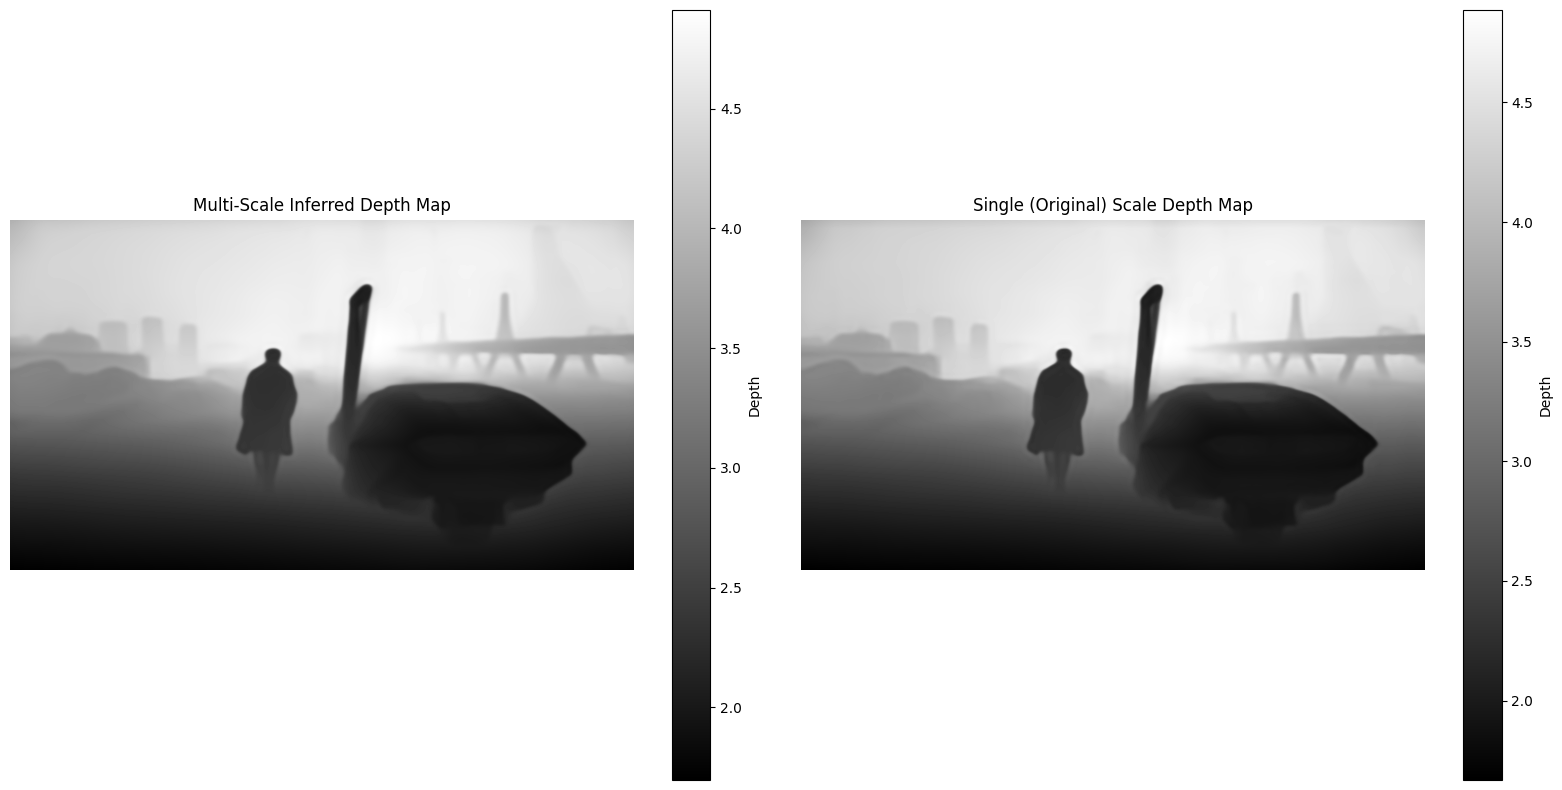

In [ ]:
# multi-scale inference
scales = [0.25, 0.5, 0.75, 1.0, 1.5, 2.0]
depth_maps = []

for scale in scales:
    scaled_image = cv2.resize(image_np, (0, 0), fx=scale, fy=scale)
    depth_map = zoe.infer_pil(Image.fromarray(scaled_image), output_type="numpy")
    depth_maps.append(cv2.resize(depth_map, (image_np.shape[1], image_np.shape[0])))

# Combine depth maps (e.g., averaging)
combined_depth = np.mean(depth_maps, axis=0)

with torch.no_grad():
    image_pil = Image.fromarray(image_np)
    full_image_tensor = transform(image_pil).unsqueeze(0).to(DEVICE)
    full_depth_map = zoe.infer_pil(image, output_type="numpy")

full_depth_map_resized = cv2.resize(full_depth_map, (image_np.shape[1], image_np.shape[0]))
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(combined_depth, cmap='gray')
plt.colorbar(label='Depth')
plt.title("Multi-Scale Inferred Depth Map")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(full_depth_map_resized, cmap='gray')
plt.colorbar(label='Depth')
plt.title("Single (Original) Scale Depth Map")
plt.axis('off')

plt.tight_layout()
plt.show()